# Visão Computacional: O Guia Completo - Reconhecimento Facial

# OpenCV

## Carregamento da base de dados

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Pré-processamento das imagens

In [3]:
import os
import pathlib
BASE_PATH = pathlib.Path("/content/yalefaces/train")
files = os.listdir(BASE_PATH)
print(files)

['subject02.sleepy.gif', 'subject03.normal.gif', 'subject05.happy.gif', 'subject01.sleepy.gif', 'subject03.centerlight.gif', 'subject02.noglasses.gif', 'subject13.centerlight.gif', 'subject12.happy.gif', 'subject11.sad.gif', 'subject03.rightlight.gif', 'subject03.sad.gif', 'subject13.wink.gif', 'subject13.noglasses.gif', 'subject08.noglasses.gif', 'subject04.centerlight.gif', 'subject06.sleepy.gif', 'subject13.surprised.gif', 'subject02.happy.gif', 'subject15.happy.gif', 'subject03.sleepy.gif', 'subject01.glasses.gif', 'subject08.centerlight.gif', 'subject05.normal.gif', 'subject10.noglasses.gif', 'subject06.surprised.gif', 'subject13.leftlight.gif', 'subject02.rightlight.gif', 'subject14.centerlight.gif', 'subject10.normal.gif', 'subject02.wink.gif', 'subject01.wink.gif', 'subject05.glasses.gif', 'subject12.sleepy.gif', 'subject08.leftlight.gif', 'subject06.sad.gif', 'subject04.sad.gif', 'subject02.glasses.gif', 'subject09.sleepy.gif', 'subject05.noglasses.gif', 'subject13.happy.gif',

In [4]:
def get_image_data():
  paths = [BASE_PATH / f for f in files]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L')
    #print(type(imagem))
    imagem_np = np.array(imagem, 'uint8')
    #print(type(imagem_np))
    #print(os.path.split(path)[1])
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)

  return np.array(ids), faces

In [5]:
ids, faces = get_image_data()

In [6]:
ids

array([ 2,  3,  5,  1,  3,  2, 13, 12, 11,  3,  3, 13, 13,  8,  4,  6, 13,
        2, 15,  3,  1,  8,  5, 10,  6, 13,  2, 14, 10,  2,  1,  5, 12,  8,
        6,  4,  2,  9,  5, 13, 13,  4, 13,  8,  5,  1,  7,  1,  6,  1, 13,
        9,  3,  9,  8,  7,  2, 10, 10,  4,  8,  1,  7, 14,  5, 10,  8, 14,
        2,  7,  9,  4, 15,  1, 12, 11, 15,  9,  7,  6,  7,  4, 15,  8,  7,
       14, 10,  2,  9,  3, 15, 11, 10, 15,  6,  7, 10, 15, 14,  7, 12,  4,
       11, 14,  5, 15,  5, 15, 14, 12, 12,  6,  3,  9, 12,  5,  9,  6, 12,
       11, 14,  8, 12, 14,  1,  4,  6,  9, 10, 11, 11, 11,  3, 11,  4])

In [7]:
len(ids)

135

In [8]:
len(faces)

135

In [9]:
faces[1], faces[1].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [10]:
ids[1]

3

In [11]:
243 * 320, 243 * 320 * 3

(77760, 233280)

## Treinamento do classificador LBPH

In [12]:
8 * 8, 9 * 9

(64, 81)

In [13]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9,grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Reconhecimento de faces

In [14]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [15]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [16]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [17]:
imagem_np.shape

(243, 320)

In [18]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 36.84750735484425)

In [19]:
previsao[0]

10

In [20]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

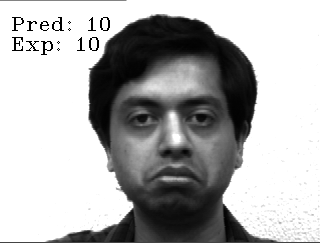

In [21]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

## Avaliação do classificador

In [22]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  #print(previsao)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  #print(saida_esperada)

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [23]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [24]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [25]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [26]:
previsoes

array([14, 13,  1, 12,  3,  7, 11,  6,  3,  4, 15,  4, 12, 12,  9,  7, 10,
        4,  5,  5,  4,  8,  4, 11, 13,  4,  7, 14,  9, 14])

In [27]:
saidas_esperadas

array([14, 13,  1, 12,  3,  9, 11,  6,  3, 10, 15,  4, 12,  2,  9,  7, 10,
        8,  5,  5,  4,  8,  2, 11, 13,  1, 15,  6,  7, 14])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

In [29]:
len(previsoes)

30

In [30]:
(30 * 70) / 100

21.0

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

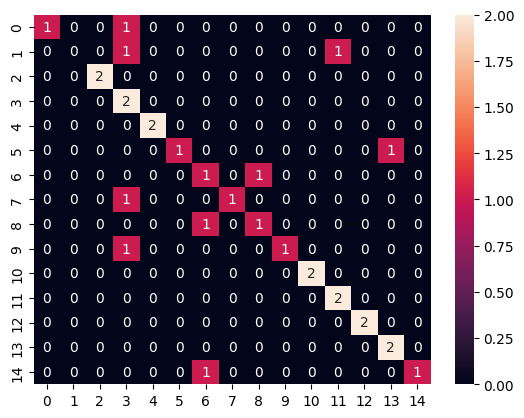

In [32]:
import seaborn
seaborn.heatmap(cm, annot=True);

# Dlib

In [33]:
import dlib

## Detecção de pontos faciais

In [34]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Weights/shape_predictor_68_face_landmarks.dat')

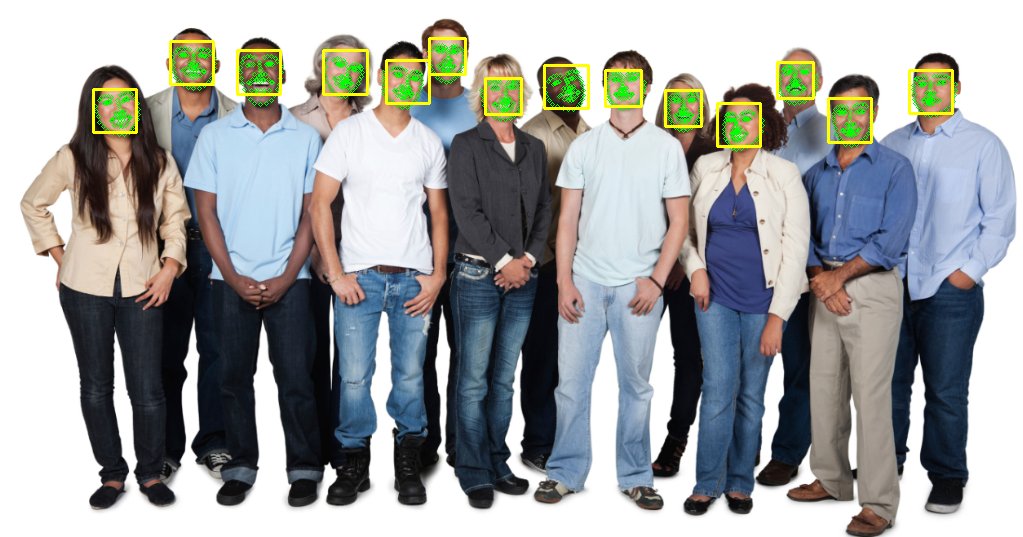

In [42]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos(imagem, face)
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,255,0), 1)


  #print(pontos.parts())
  #print(len(pontos.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l,t), (r, b), (0,255,255), 2)
cv2_imshow(imagem)

## Detecção de descritores faciais

In [36]:
# Resnet: https://arxiv.org/abs/1512.03385
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [38]:
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np, (l,t), (r,b), (0,0,255), 2)

    pontos = detector_pontos(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,255,0), 1)

    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    #print(type(descritor_facial))
    #print(len(descritor_facial))
    #print(descritor_facial)
    descritor_facial = [f for f in descritor_facial]
    #print(descritor_facial)
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    #print(descritor_facial)
    #print(descritor_facial.shape)
    descritor_facial = descritor_facial[np.newaxis, :]
    #print(descritor_facial.shape)
    #print(descritor_facial)

    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis = 0)

    index[idx] = path
    idx += 1
  # cv2_imshow(imagem_np)

In [39]:
descritores_faciais.shape

(132, 128)

In [40]:
descritores_faciais

array([[-0.15744105,  0.04295208, -0.00066937, ...,  0.03094248,
         0.07517749,  0.03862835],
       [-0.19656   ,  0.15330535,  0.03748804, ..., -0.15132156,
         0.13816001,  0.05165105],
       [-0.09758417,  0.01798978, -0.09853604, ..., -0.00577515,
        -0.01994063,  0.06262891],
       ...,
       [-0.19656   ,  0.15330535,  0.03748804, ..., -0.15132156,
         0.13816001,  0.05165105],
       [-0.14048161,  0.10236113, -0.02427287, ...,  0.01386826,
         0.09258297,  0.02267008],
       [-0.17317143,  0.09850319,  0.05565149, ..., -0.00197637,
         0.13108057, -0.05130087]])

In [41]:
print(index)

{0: '/content/yalefaces/train/subject02.sleepy.gif', 1: '/content/yalefaces/train/subject03.normal.gif', 2: '/content/yalefaces/train/subject05.happy.gif', 3: '/content/yalefaces/train/subject01.sleepy.gif', 4: '/content/yalefaces/train/subject03.centerlight.gif', 5: '/content/yalefaces/train/subject02.noglasses.gif', 6: '/content/yalefaces/train/subject13.centerlight.gif', 7: '/content/yalefaces/train/subject12.happy.gif', 8: '/content/yalefaces/train/subject11.sad.gif', 9: '/content/yalefaces/train/subject03.rightlight.gif', 10: '/content/yalefaces/train/subject03.sad.gif', 11: '/content/yalefaces/train/subject13.wink.gif', 12: '/content/yalefaces/train/subject13.noglasses.gif', 13: '/content/yalefaces/train/subject08.noglasses.gif', 14: '/content/yalefaces/train/subject04.centerlight.gif', 15: '/content/yalefaces/train/subject06.sleepy.gif', 16: '/content/yalefaces/train/subject13.surprised.gif', 17: '/content/yalefaces/train/subject02.happy.gif', 18: '/content/yalefaces/train/subje

In [42]:
len(index)

132

## Cálculo da distância entre as faces

In [43]:
descritores_faciais[131]

array([-0.17317143,  0.09850319,  0.05565149, -0.05539166, -0.02879364,
       -0.05965044, -0.03995384, -0.12057955,  0.1795139 , -0.1074136 ,
        0.27764782, -0.03938857, -0.17637132, -0.15631714, -0.02652274,
        0.19985303, -0.22547206, -0.12447175, -0.00685549,  0.0062328 ,
        0.12772101,  0.02508532,  0.02925843,  0.01277176, -0.1467247 ,
       -0.33570987, -0.11110421, -0.12610075,  0.00267787, -0.03639387,
       -0.05409667, -0.06916443, -0.21351573, -0.09771923,  0.02578943,
        0.03174271, -0.0327326 , -0.08004859,  0.18143462,  0.00674604,
       -0.20764428,  0.01678371,  0.06446841,  0.23195803,  0.18343355,
        0.03515407,  0.02022967, -0.17999649,  0.13814646, -0.11280209,
       -0.00797381,  0.10111541,  0.08912262,  0.04173018,  0.03008559,
       -0.11800309,  0.00203958,  0.10468481, -0.13025066, -0.02265401,
        0.07056812, -0.0411974 , -0.05078281, -0.08433531,  0.24512662,
        0.02995064, -0.14742531, -0.16225812,  0.1209392 , -0.06

In [50]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[131])

0.0

In [44]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[130])

0.7434885170553793

In [45]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[129])

0.7611747682806597

In [46]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[128])

0.7514672084245992

In [47]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[119])

0.60653114352114

In [48]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais, axis = 1)

array([0.        , 0.73931007, 0.64881652, 0.56859613, 0.81286293,
       0.32493934, 0.63901582, 0.66554346, 0.6263595 , 0.76261518,
       0.7318316 , 0.50805171, 0.61481398, 0.82777466, 0.82177025,
       0.65827866, 0.67154996, 0.35795629, 0.68296781, 0.75322928,
       0.65244518, 0.7910054 , 0.63168546, 0.78632227, 0.68609375,
       0.68108428, 0.4332422 , 0.81878694, 0.76465   , 0.35179125,
       0.65563698, 0.61100968, 0.56575446, 0.79200121, 0.68071623,
       0.77217891, 0.39438792, 0.5439809 , 0.58445269, 0.60026077,
       0.54885637, 0.7638343 , 0.5676277 , 0.76696577, 0.55432175,
       0.68772052, 0.65179239, 0.67870927, 0.7205077 , 0.63168206,
       0.5826391 , 0.74698758, 0.58303378, 0.78092235, 0.66475426,
       0.45435305, 0.74276844, 0.73820326, 0.77996175, 0.80840042,
       0.64399851, 0.72705849, 0.76519635, 0.72470353, 0.75566456,
       0.82684754, 0.32493934, 0.70412525, 0.60447036, 0.77217891,
       0.68127233, 0.68937378, 0.63064573, 0.58957335, 0.73762

In [49]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1))

84

In [50]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1)[18]

0.7532292775722511

## Detecção de faces com Dlib

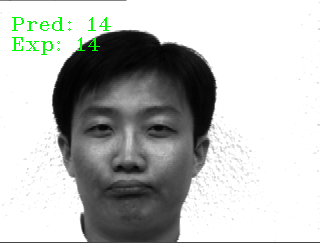

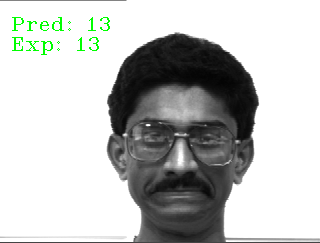

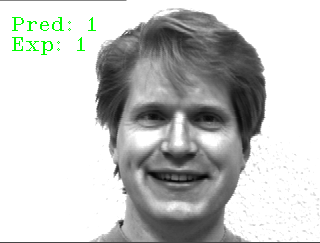

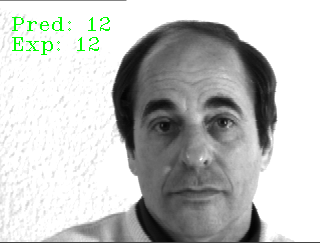

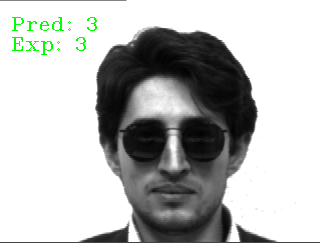

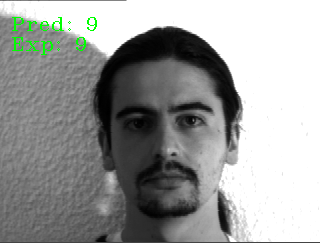

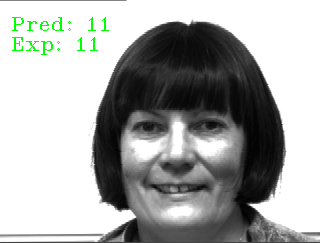

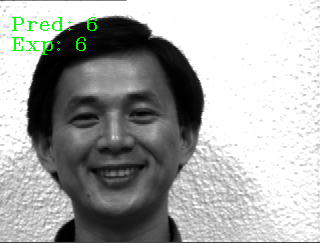

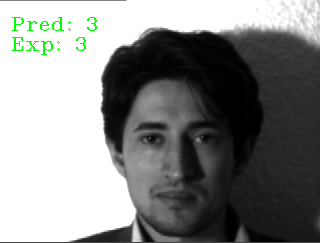

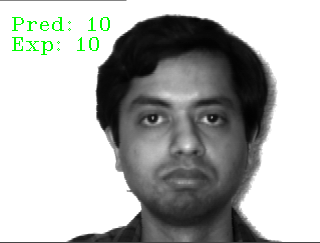

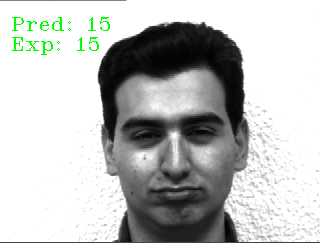

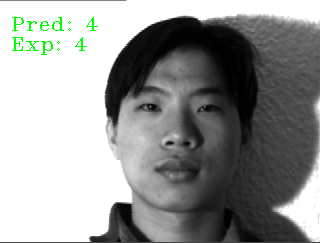

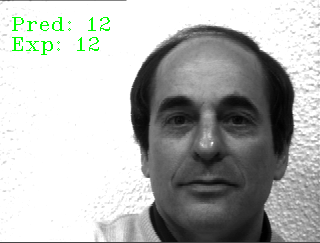

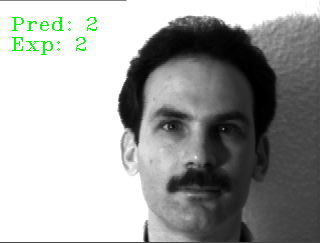

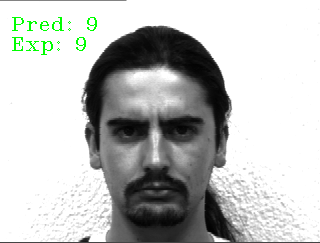

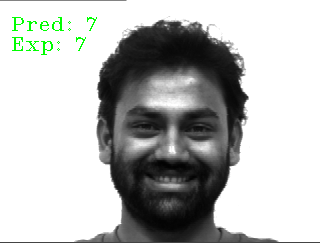

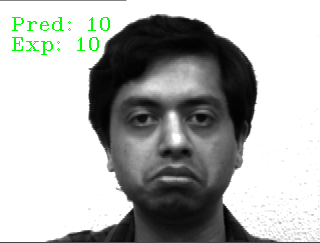

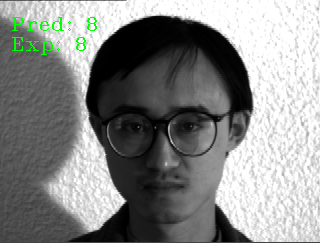

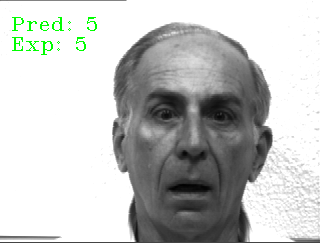

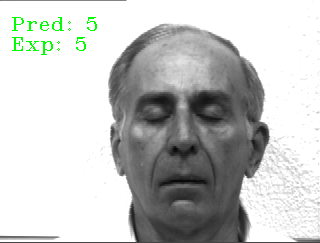

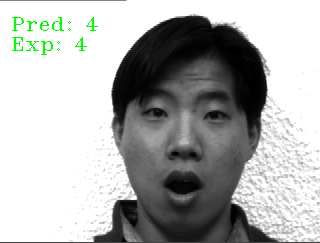

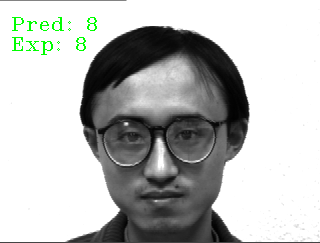

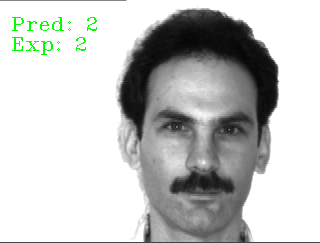

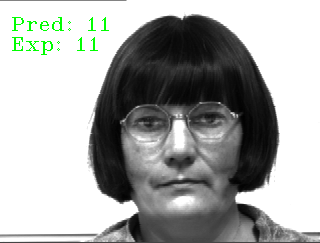

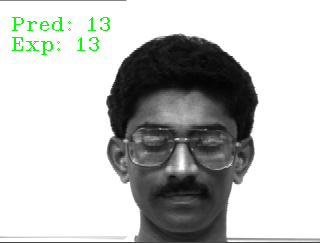

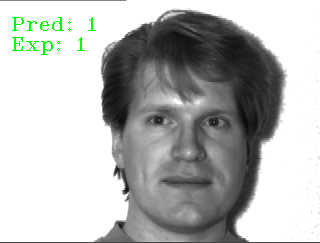

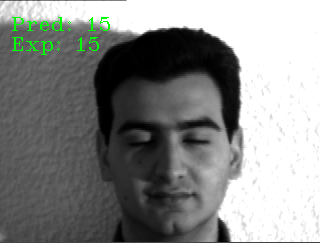

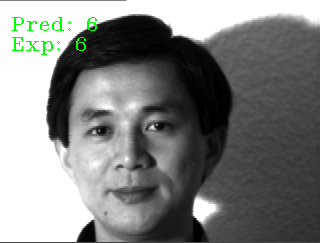

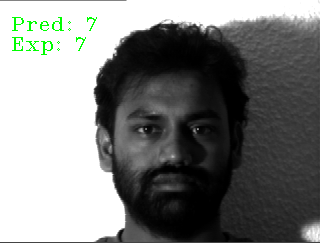

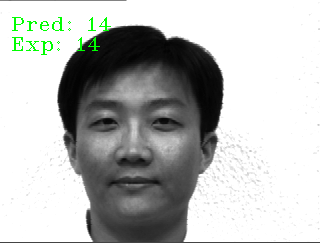

In [51]:
confianca = 0.5
previsoes = []
saidas_esperadas = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    pontos = detector_pontos(imagem_np, face)
    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis = 1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      nome_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject', ''))
    else:
      nome_previsao = 'Face não identificada'

    nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    previsoes.append(nome_previsao)
    saidas_esperadas.append(nome_real)

    cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))

  cv2_imshow(imagem_np)

previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [52]:
previsoes

array([14, 13,  1, 12,  3,  9, 11,  6,  3, 10, 15,  4, 12,  2,  9,  7, 10,
        8,  5,  5,  4,  8,  2, 11, 13,  1, 15,  6,  7, 14])

In [53]:
saidas_esperadas

array([14, 13,  1, 12,  3,  9, 11,  6,  3, 10, 15,  4, 12,  2,  9,  7, 10,
        8,  5,  5,  4,  8,  2, 11, 13,  1, 15,  6,  7, 14])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

1.0

# Exercício

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Datasets/gustavo.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

path = '/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Datasets/jones_gabriel.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [94]:
!pip install pyheif

In [117]:
from PIL import Image
import pyheif

paths = [os.path.join('/content/gustavo', f) for f in os.listdir('/content/gustavo')]

cont = 1
for path in paths:
  # Carregue uma imagem HEIC
  if ".heic" not in path:
    new_path = f"/content/gustavo/gustavo{cont}.3.{path.split('.')[-1]}"
    os.rename(path, new_path)
    cont += 1
    continue

  heif_file = pyheif.read(path)

  # Converta a imagem HEIC em formato RGB (JPEG, PNG, etc.)
  image = Image.frombytes(
      heif_file.mode,
      heif_file.size,
      heif_file.data,
      "raw",
      heif_file.mode,

      heif_file.stride,
  )

  # Salve a imagem convertida em um formato suportado pelo Pillow
  image.save(f"/content/gustavo/gustavo{cont}.3.jpg", format="JPEG")
  os.unlink(path)
  cont += 1

In [121]:
def get_image_data():
  paths = [os.path.join('/content/gustavo', f) for f in os.listdir('/content/gustavo')]
  paths = [*paths, *[os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [122]:
ids, faces = get_image_data()

In [123]:
ids

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1])

In [124]:
len(faces)

65

In [125]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [126]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [130]:
paths = [os.path.join('/content/gustavo', f) for f in os.listdir('/content/gustavo')]
paths = [*paths, *[os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]]
for path in paths:
  image = Image.open(path).convert('L')
  image = image.resize((400, 600))
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)

Output hidden; open in https://colab.research.google.com to view.